In [1]:
import pandas as pd
import wget
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
data_dir = '/Users/domenjemec/data/rnaseq/'
code_dir = '/Users/domenjemec/code/rnaseq/'


# source = https://genviz.org/module-04-expression/0004/02/01/DifferentialExpression/
counts_path = 'https://www.ebi.ac.uk/gxa/experiments-content/E-GEOD-50760/resources/DifferentialSecondaryDataFiles.RnaSeq/raw-counts'
metadata_path = 'https://www.ebi.ac.uk/gxa/experiments-content/E-GEOD-50760/resources/ExperimentDesignFile.RnaSeq/experiment-design'


In [3]:
count = wget.download(counts_path, data_dir)
metadata = wget.download(metadata_path, data_dir)

-1 / unknown

In [4]:
count

'/Users/domenjemec/data/rnaseq//E-GEOD-50760-raw-counts.tsv'

In [5]:
count_df = pd.read_csv(count, delimiter='\t')
count_df.head()

,Gene ID,Gene Name,SRR975562,SRR975555,SRR975597,SRR975571,SRR975553,SRR975567,SRR975590,SRR975581,...,SRR975604,SRR975594,SRR975560,SRR975580,SRR975570,SRR975602,SRR975561,SRR975573,SRR975587,SRR975576
0,ENSG00000000003,TSPAN6,1990,874,1011,1366,867,619,1800,385,...,1144,566,1065,1596,394,1451,804,571,1825,783
1,ENSG00000000005,TNMD,12,4,6,11,12,1,3,2,...,3,0,3,17,1,0,4,13,2,2
2,ENSG00000000419,DPM1,681,978,610,432,293,400,560,157,...,689,134,384,444,157,560,301,229,717,192
3,ENSG00000000457,SCYL3,165,221,138,309,207,248,158,146,...,185,89,133,178,133,85,147,182,165,146
4,ENSG00000000460,C1orf112,88,109,88,42,38,108,116,27,...,50,25,37,66,20,84,21,37,138,19


In [57]:
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58735 entries, 0 to 58734
Data columns (total 56 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gene ID    58735 non-null  object
 1   Gene Name  40526 non-null  object
 2   SRR975562  58735 non-null  int64 
 3   SRR975555  58735 non-null  int64 
 4   SRR975597  58735 non-null  int64 
 5   SRR975571  58735 non-null  int64 
 6   SRR975553  58735 non-null  int64 
 7   SRR975567  58735 non-null  int64 
 8   SRR975590  58735 non-null  int64 
 9   SRR975581  58735 non-null  int64 
 10  SRR975601  58735 non-null  int64 
 11  SRR975556  58735 non-null  int64 
 12  SRR975574  58735 non-null  int64 
 13  SRR975566  58735 non-null  int64 
 14  SRR975554  58735 non-null  int64 
 15  SRR975589  58735 non-null  int64 
 16  SRR975598  58735 non-null  int64 
 17  SRR975586  58735 non-null  int64 
 18  SRR975564  58735 non-null  int64 
 19  SRR975558  58735 non-null  int64 
 20  SRR975563  58735 non-null  i

In [6]:
md_df = pd.read_csv(metadata, delimiter='\t')
md_df.head()

,Run,Sample Characteristic[biopsy site],Sample Characteristic Ontology Term[biopsy site],Sample Characteristic[disease],Sample Characteristic Ontology Term[disease],Sample Characteristic[disease staging],Sample Characteristic Ontology Term[disease staging],Sample Characteristic[individual],Sample Characteristic Ontology Term[individual],Sample Characteristic[organism],Sample Characteristic Ontology Term[organism],Sample Characteristic[organism part],Sample Characteristic Ontology Term[organism part],Factor Value[biopsy site],Factor Value Ontology Term[biopsy site],Analysed
0,SRR975551,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,colorectal cancer,http://www.ebi.ac.uk/efo/EFO_0005842,Stage IV Colorectal Cancer,NaN,AMC_2,NaN,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,colon,http://purl.obolibrary.org/obo/UBERON_0001155,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,Yes
1,SRR975552,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,colorectal cancer,http://www.ebi.ac.uk/efo/EFO_0005842,Stage IV Colorectal Cancer,NaN,AMC_3,NaN,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,colon,http://purl.obolibrary.org/obo/UBERON_0001155,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,Yes
2,SRR975553,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,colorectal cancer,http://www.ebi.ac.uk/efo/EFO_0005842,Stage IV Colorectal Cancer,NaN,AMC_5,NaN,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,colon,http://purl.obolibrary.org/obo/UBERON_0001155,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,Yes
3,SRR975554,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,colorectal cancer,http://www.ebi.ac.uk/efo/EFO_0005842,Stage IV Colorectal Cancer,NaN,AMC_6,NaN,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,colon,http://purl.obolibrary.org/obo/UBERON_0001155,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,Yes
4,SRR975555,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,colorectal cancer,http://www.ebi.ac.uk/efo/EFO_0005842,Stage IV Colorectal Cancer,NaN,AMC_7,NaN,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,colon,http://purl.obolibrary.org/obo/UBERON_0001155,primary tumor,http://www.ebi.ac.uk/efo/EFO_0000616,Yes


In [7]:
sample_df = md_df[['Run','Sample Characteristic[biopsy site]']]
sample_df.columns = ['sample_id','tissue_type']
sample_df.head()

,sample_id,tissue_type
0,SRR975551,primary tumor
1,SRR975552,primary tumor
2,SRR975553,primary tumor
3,SRR975554,primary tumor
4,SRR975555,primary tumor


In [8]:
cohorts = sample_df.tissue_type.unique()

c0 = sample_df[sample_df.tissue_type == cohorts[0]].sample_id.tolist()
c1 = sample_df[sample_df.tissue_type == cohorts[1]].sample_id.tolist()
c2 = sample_df[sample_df.tissue_type == cohorts[2]].sample_id.tolist()

In [9]:
ct_df = count_df.T
ct_df = ct_df.rename(columns=ct_df.iloc[1]).drop(ct_df.index[1]).drop(ct_df.index[0])
ct_df.head()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,LINC02689,NaN,NaN,NaN,H2AQ1P,NBEAP6,NaN,NaN,NaN,NaN
SRR975562,1990,12,681,165,88,60,375,955,435,420,...,0,0,0,0,0,0,2,0,0,0
SRR975555,874,4,978,221,109,84,201,991,693,539,...,0,0,0,0,0,0,0,0,0,2
SRR975597,1011,6,610,138,88,81,1350,276,551,342,...,0,0,0,0,0,0,0,0,1,2
SRR975571,1366,11,432,309,42,121,1615,914,650,464,...,0,0,0,0,0,0,3,0,0,1
SRR975553,867,12,293,207,38,89,1035,623,421,273,...,0,0,0,0,0,0,0,0,0,0


In [35]:
plt_df = ct_df.iloc[:,0:5]
plt_df[['c']] = ''
plt_df.head()

/opt/anaconda3/envs/working_personal/lib/python3.9/site-packages/pandas/core/frame.py:3645: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = value


,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,c
SRR975562,1990,12,681,165,88,
SRR975555,874,4,978,221,109,
SRR975597,1011,6,610,138,88,
SRR975571,1366,11,432,309,42,
SRR975553,867,12,293,207,38,


In [47]:
plt_df.loc[c0,'c'] = 'c0'
plt_df.loc[c1,'c'] = 'c1'
plt_df.loc[c2,'c'] = 'c2'

/opt/anaconda3/envs/working_personal/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [49]:
plt_df.head()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,c
SRR975562,1990,12,681,165,88,c0
SRR975555,874,4,978,221,109,c0
SRR975597,1011,6,610,138,88,c2
SRR975571,1366,11,432,309,42,c1
SRR975553,867,12,293,207,38,c0


<AxesSubplot:xlabel='c', ylabel='SCYL3'>

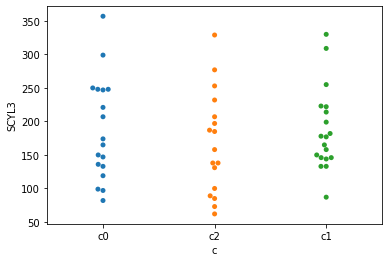

In [54]:
sns.swarmplot(x='c',y='SCYL3',data=plt_df)